In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score

In [40]:
data = pd.read_csv("D:\\Data\Res.csv")
data

,Year,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,...,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,Regime,P/E,Dividend Yield
0,1996-01,8909.327,74.6841,125125,5.6,118316,23196,23947,1467,1387,...,1.5288,129.7,125.5,154.700,636.020020,1059.790039,20.754421,Normal,18.6845,2.26
1,1996-02,8983.863,75.8344,125639,5.5,118739,23280,23988,1491,1420,...,1.5360,129.7,125.0,155.000,640.429993,1100.050049,21.372637,Normal,18.8140,2.16
2,1996-03,9015.588,75.7631,125862,5.5,118993,23276,24030,1424,1437,...,1.5271,130.5,125.3,155.500,645.500000,1101.400024,21.460953,Normal,18.9630,2.18
3,1996-04,9039.466,76.4562,125994,5.6,119158,23316,24043,1516,1463,...,1.5160,130.9,125.7,156.100,654.169983,1190.520020,21.637589,Normal,18.7388,2.19
4,1996-05,9078.928,77.0161,126244,5.6,119486,23358,24137,1504,1457,...,1.5152,130.9,126.2,156.400,669.119995,1243.430054,22.255806,Normal,19.1670,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,2020-02,17219.643,109.2966,158759,3.5,152463,21205,27830,1567,1438,...,1.2953,206.0,195.2,259.050,2954.219971,8567.370117,18.868309,Normal,25.3952,1.97
289,2020-03,16947.234,104.5221,155772,4.4,151090,21086,27723,1269,1356,...,1.2369,202.4,192.2,257.953,2584.590088,7700.100098,18.215258,Recession,22.2177,2.25
290,2020-04,19124.430,91.2658,133403,14.7,130303,18698,24475,934,1066,...,1.2420,196.3,185.3,255.902,2912.429932,8889.549805,25.572948,Recession,25.0359,2.41
291,2020-05,18296.406,92.0613,137242,13.3,133028,19374,24858,1038,1216,...,1.2302,200.4,185.3,255.768,3044.310059,9489.870117,23.862782,Recession,26.1696,2.10


In [41]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  

data['Regime'] = data['Regime'].replace({'Normal': 0, 'Recession': 1})

In [42]:
counts = data['Regime'].value_counts()
print(counts)

0    263
1     30
Name: Regime, dtype: int64


In [43]:
data.drop("Year",axis=1)

,RPI,INDPRO,CE16OV,UNRATE,PAYEMS,USGOOD,USTPU,HOUST,PERMIT,DPCERA3M086SBEA,...,EXUSUK,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,GOLDBAR,Regime,P/E,Dividend Yield
0,8909.327,74.6841,125125,5.6,118316,23196,23947,1467,1387,63.691,...,1.5288,129.7,125.5,154.700,636.020020,1059.790039,20.754421,0,18.6845,2.26
1,8983.863,75.8344,125639,5.5,118739,23280,23988,1491,1420,64.180,...,1.5360,129.7,125.0,155.000,640.429993,1100.050049,21.372637,0,18.8140,2.16
2,9015.588,75.7631,125862,5.5,118993,23276,24030,1424,1437,64.491,...,1.5271,130.5,125.3,155.500,645.500000,1101.400024,21.460953,0,18.9630,2.18
3,9039.466,76.4562,125994,5.6,119158,23316,24043,1516,1463,64.729,...,1.5160,130.9,125.7,156.100,654.169983,1190.520020,21.637589,0,18.7388,2.19
4,9078.928,77.0161,126244,5.6,119486,23358,24137,1504,1457,64.813,...,1.5152,130.9,126.2,156.400,669.119995,1243.430054,22.255806,0,19.1670,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,17219.643,109.2966,158759,3.5,152463,21205,27830,1567,1438,121.765,...,1.2953,206.0,195.2,259.050,2954.219971,8567.370117,18.868309,0,25.3952,1.97
289,16947.234,104.5221,155772,4.4,151090,21086,27723,1269,1356,113.894,...,1.2369,202.4,192.2,257.953,2584.590088,7700.100098,18.215258,1,22.2177,2.25
290,19124.430,91.2658,133403,14.7,130303,18698,24475,934,1066,99.932,...,1.2420,196.3,185.3,255.902,2912.429932,8889.549805,25.572948,1,25.0359,2.41
291,18296.406,92.0613,137242,13.3,133028,19374,24858,1038,1216,108.449,...,1.2302,200.4,185.3,255.768,3044.310059,9489.870117,23.862782,1,26.1696,2.10


In [44]:
# DOMAIN 1

In [45]:
features = ['DTCTHFNM', 'T1YFFM', 'AAAFFM', 'TB3SMFFM']  
target = 'Regime'


data_1 = data[features + [target]]

In [46]:
data_1

,DTCTHFNM,T1YFFM,AAAFFM,TB3SMFFM,Regime
0,285496.58,-0.47,1.25,-0.56,0
1,286101.17,-0.28,1.77,-0.39,0
2,287684.78,0.03,2.04,-0.35,0
3,289724.92,0.32,2.28,-0.27,0
4,295386.41,0.40,2.38,-0.22,0
...,...,...,...,...,...
288,721485.11,-0.17,1.20,-0.06,0
289,717529.56,-0.30,2.39,-0.34,1
290,713029.46,0.13,2.38,0.09,1
291,716175.76,0.11,2.45,0.08,1


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min

In [48]:
feature_means = data_1[features].mean()

# Calculating distances from the mean for each row
distances = np.linalg.norm(data_1[features] - feature_means, axis=1)

# Sorting the data based on distances
data_1['Distance'] = distances
data_1_sorted = data_1.sort_values(by='Distance')

# Selecting the top 18% closest rows
top_18_percent = int(0.90 * len(data_1_sorted))
selected_rows = data_1_sorted.head(top_18_percent)


<ipython-input-48-f31b5b3eb251>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Distance'] = distances


In [49]:
print("Count of Selected Rows:", len(selected_rows))


Count of Selected Rows: 263


In [50]:
# Printing the entire rows from the original data corresponding to the selected rows
selected_rows_from_original_data_1 = data.loc[selected_rows.index]
print("Selected Rows from Original Data:")
print(selected_rows_from_original_data_1)

Selected Rows from Original Data:
        Year        RPI   INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
173  2010-07  13176.118  94.8536  139179     9.4  130427   17777  24574   
174  2010-08  13224.463  95.1448  139438     9.5  130422   17793  24577   
172  2010-06  13137.355  94.4397  139141     9.4  130511   17763  24549   
93   2003-10  11620.297  94.2079  137984     6.0  130454   21691  25253   
94   2003-11  11690.647  94.9338  138424     5.8  130474   21688  25211   
..       ...        ...      ...     ...     ...     ...     ...    ...   
34   1998-11  10288.061  89.1098  132280     4.4  127231   24394  25313   
33   1998-10  10238.215  89.1677  131999     4.5  126954   24406  25262   
32   1998-09  10218.250  88.4515  131986     4.6  126752   24419  25249   
31   1998-08  10182.172  88.6247  131390     4.5  126544   24420  25199   
30   1998-07  10143.124  86.8423  131329     4.5  126205   24238  25159   

     HOUST  PERMIT  ...  EXUSUK  WPSFD49207  WPSID61  CPIAUCSL   

In [51]:
#DOMAIN2

In [52]:
features_2 = ['USGOOD', 'USTPU', 'BUSINV', 'ISRATIO', 'M1SL', 'M2SL', 'TOTRESNS', 'BUSLOANS', 'P/E', 'Dividend Yield']  # Replace these with your actual feature names
target = 'Regime'

# Creating a new dataset with only the selected features
data_2 = data[features_2 + [target]]

In [53]:
data_2

,USGOOD,USTPU,BUSINV,ISRATIO,M1SL,M2SL,TOTRESNS,BUSLOANS,P/E,Dividend Yield,Regime
0,23196,23947,990730,1.50,1123.5,3647.9,56.9,721.8115,18.6845,2.26,0
1,23280,23988,991277,1.50,1118.5,3661.8,53.8,724.1690,18.8140,2.16,0
2,23276,24030,989146,1.46,1122.6,3687.0,54.9,727.3465,18.9630,2.18,0
3,23316,24043,992111,1.46,1124.8,3697.8,55.9,732.0780,18.7388,2.19,0
4,23358,24137,993761,1.45,1116.5,3709.6,53.2,736.4489,19.1670,2.15,0
...,...,...,...,...,...,...,...,...,...,...,...
288,21205,27830,2013829,1.38,4003.1,15446.9,1726.9,2348.3682,25.3952,1.97,0
289,21086,27723,2007046,1.45,4256.7,15989.9,2099.4,2567.9365,22.2177,2.25,1
290,18698,24475,1979748,1.67,4799.1,17020.1,2953.6,2932.6981,25.0359,2.41,1
291,19374,24858,1933282,1.50,5035.3,17868.6,3217.6,3041.1640,26.1696,2.10,1


In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min


# Calculating means for each feature
feature_means_2 = data_2[features_2].mean()

# Calculating distances from the mean for each row
distances_2 = np.linalg.norm(data_2[features_2] - feature_means_2, axis=1)

# Sorting the data based on distances
data_2['Distance'] = distances_2
data_2_sorted = data_2.sort_values(by='Distance')

# Selecting the top 65% closest rows
top_18_percent_2 = int(0.65 * len(data_2_sorted))
selected_rows_2 = data_2_sorted.head(top_18_percent_2)

# Displaying the count of selected rows
print("Count of Selected Rows (Feature Set 2):", len(selected_rows_2))

# Printing the entire rows from the original data corresponding to the selected rows
selected_rows_from_original_data_2 = data.loc[selected_rows_2.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_2)


Count of Selected Rows (Feature Set 2): 190
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
136  2007-06  13127.988  104.5617  146063     4.6  138069   22323  26549   
137  2007-07  13134.159  104.5227  145905     4.7  138038   22277  26560   
155  2009-01  12971.020   91.0373  142152     7.8  134055   19889  25415   
135  2007-05  13144.673  104.5322  145903     4.4  137993   22323  26560   
178  2010-12  13374.156   96.0599  139301     9.3  130822   17796  24686   
..       ...        ...       ...     ...     ...     ...     ...    ...   
228  2015-02  15169.760  105.4425  148045     5.5  140839   19537  26657   
42   1999-07  10457.086   91.7766  133414     4.3  129414   24474  25757   
229  2015-03  15139.301  105.1464  148128     5.4  140910   19505  26684   
41   1999-06  10438.054   91.1994  133378     4.3  129089   24434  25701   
40   1999-05  10400.076   91.3520  133311     4.2  128808   24445  256

<ipython-input-54-504956757177>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Distance'] = distances_2


In [55]:
#Domain 3

In [56]:
features_3 = ['SP500', 'NASDAQ', 'GOLDBAR'] # Replace these with your actual feature names
target = 'Regime'


data_3= data[features_3+ [target]]

In [57]:
data_3

,SP500,NASDAQ,GOLDBAR,Regime
0,636.020020,1059.790039,20.754421,0
1,640.429993,1100.050049,21.372637,0
2,645.500000,1101.400024,21.460953,0
3,654.169983,1190.520020,21.637589,0
4,669.119995,1243.430054,22.255806,0
...,...,...,...,...
288,2954.219971,8567.370117,18.868309,0
289,2584.590088,7700.100098,18.215258,1
290,2912.429932,8889.549805,25.572948,1
291,3044.310059,9489.870117,23.862782,1


In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min

feature_means_3 = data_3[features_3].mean()

distances_3 = np.linalg.norm(data_3[features_3] - feature_means_3, axis=1)

data_3['Distance'] = distances_3
data_3_sorted = data_3.sort_values(by='Distance')

top_10_percent_3 = int(0.50 * len(data_3_sorted))
selected_rows_3 = data_3_sorted.head(top_10_percent_3)

print("Count of Selected Rows (Feature Set 2):", len(selected_rows_3))

selected_rows_from_original_data_3 = data.loc[selected_rows_3.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_3)


Count of Selected Rows (Feature Set 2): 146
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
205  2013-03  13865.456  101.8114  143316     7.5  135680   18660  25602   
206  2013-04  13930.178  101.6364  143635     7.6  135871   18653  25637   
57   2000-10  11173.664   95.3970  137088     3.9  132351   24638  26214   
52   2000-05  11021.996   95.6435  136630     4.0  132105   24647  26137   
46   1999-11  10657.501   93.4371  134309     4.1  130466   24561  25937   
..       ...        ...       ...     ...     ...     ...     ...    ...   
164  2009-10  12709.966   89.9797  138432    10.0  130045   17915  24537   
109  2005-03  12080.643   99.3061  140654     5.2  133156   22066  25744   
95   2003-12  11701.031   94.8662  138411     5.7  130588   21703  25207   
98   2004-03  11730.978   95.2088  138453     5.8  131142   21758  25382   
49   2000-02  10899.897   94.4557  136598     4.1  131124   24609  260

<ipython-input-58-8a3931a6a31e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['Distance'] = distances_3


In [59]:
features_4 = ['FEDFUNDS', 'TB3MS', 'TB6MS', 'GS1', 'GS5', 'GS10','AAA', 'TB3SMFFM'] # Replace these with your actual feature names
target = 'Regime'

data_4 = data[features_4+ [target]]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min


feature_means_4 = data_4[features_4].mean()


distances_4 = np.linalg.norm(data_4[features_4] - feature_means_4, axis=1)

data_4['Distance'] = distances_4
data_4_sorted = data_4.sort_values(by='Distance')

top_10_percent_4 = int(0.45 * len(data_4_sorted))
selected_rows_4 = data_4_sorted.head(top_10_percent_4)

print("Count of Selected Rows (Feature Set 2):", len(selected_rows_4))

selected_rows_from_original_data_4 = data.loc[selected_rows_4.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_4)


Count of Selected Rows (Feature Set 2): 131
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
148  2008-06  13359.533  102.8445  145737     5.6  137687   21483  26323   
106  2004-12  12354.110   98.3318  140125     5.4  132624   22005  25622   
150  2008-08  13054.138  100.7353  145203     6.1  137213   21250  26166   
105  2004-11  11945.706   97.6137  140231     5.4  132503   21997  25598   
147  2008-05  13704.098  103.0863  145908     5.4  137858   21599  26384   
..       ...        ...       ...     ...     ...     ...     ...    ...   
165  2009-11  12743.645   90.3375  138659     9.9  130057   17869  24519   
179  2011-01  13541.211   95.9364  139250     9.1  130841   17784  24721   
172  2010-06  13137.355   94.4397  139141     9.4  130511   17763  24549   
181  2011-03  13540.028   96.4643  139639     9.0  131288   17906  24845   
178  2010-12  13374.156   96.0599  139301     9.3  130822   17796  246

<ipython-input-59-4378b5045070>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_4['Distance'] = distances_4


In [60]:
features_5 = ['AMDMUO'] # Replace these with your actual feature names
target = 'Regime'

data_5 = data[features_5 + [target]]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min


feature_means_5 = data_5[features_5].mean()


distances_5 = np.linalg.norm(data_5[features_5] - feature_means_5, axis=1)

data_5['Distance'] = distances_5
data_5_sorted = data_5.sort_values(by='Distance')

top_10_percent_5 = int(0.40 * len(data_5_sorted))
selected_rows_5 = data_5_sorted.head(top_10_percent_5)

print("Count of Selected Rows (Feature Set 2):", len(selected_rows_5))

selected_rows_from_original_data_5 = data.loc[selected_rows_5.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_5)


Count of Selected Rows (Feature Set 2): 117
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
131  2007-01  13033.906  102.4933  146028     4.6  137477   22439  26418   
132  2007-02  13096.338  103.5264  146057     4.5  137558   22334  26466   
130  2006-12  12998.472  103.0292  145970     4.4  137249   22405  26372   
166  2009-12  12808.646   90.6132  138013     9.9  129788   17792  24409   
167  2010-01  12860.097   91.6642  138438     9.8  129790   17707  24476   
..       ...        ...       ...     ...     ...     ...     ...    ...   
56   2000-09  11159.329   95.6790  136893     3.9  132353   24642  26194   
60   2001-01  11276.396   94.5448  137778     4.2  132698   24533  26202   
57   2000-10  11173.664   95.3970  137088     3.9  132351   24638  26214   
103  2004-08  11944.486   96.4095  139573     5.4  131937   21944  25497   
102  2004-07  11898.458   96.3385  139556     5.5  131848   21900  254

<ipython-input-60-d49a4746d3cb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5['Distance'] = distances_5


In [61]:
features_6 = ['RPI','INDPRO','CE16OV','UNRATE','PAYEMS','HOUST','PERMIT','DPCERA3M086SBEA','AMTMNO'] # Replace these with your actual feature names
target = 'Regime'

data_6 = data[features_6 + [target]]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min

feature_means_6 = data_6[features_6].mean()

distances_6 = np.linalg.norm(data_6[features_6] - feature_means_6, axis=1)

data_6['Distance'] = distances_6
data_6_sorted = data_6.sort_values(by='Distance')

top_10_percent_6 = int(0.35 * len(data_6_sorted))
selected_rows_6 = data_6_sorted.head(top_10_percent_6)

print("Count of Selected Rows (Feature Set 2):", len(selected_rows_6))

selected_rows_from_original_data_6 = data.loc[selected_rows_6.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_6)


Count of Selected Rows (Feature Set 2): 102
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
115  2005-09  12202.979   98.0779  142401     5.0  134566   22226  25988   
114  2005-08  12241.010   99.9435  142434     4.9  134498   22228  25997   
112  2005-06  12212.817   99.9853  141714     5.0  133942   22185  25903   
116  2005-10  12293.246   99.3149  142548     5.0  134655   22292  25997   
173  2010-07  13176.118   94.8536  139179     9.4  130427   17777  24574   
..       ...        ...       ...     ...     ...     ...     ...    ...   
161  2009-07  12774.081   88.0323  139901     9.5  130668   18278  24734   
140  2007-10  13139.629  104.7171  145946     4.7  138174   22056  26585   
183  2011-05  13505.003   96.3377  139624     9.0  131703   18007  24947   
48   2000-01  10855.813   94.1758  136559     4.0  131005   24628  26061   
253  2017-03  15841.812  103.3430  152978     4.4  145944   19964  273

<ipython-input-61-d448735d5c25>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_6['Distance'] = distances_6


In [62]:
features_7 = ['EXSZUS','EXCAUS','EXUSUK','WPSFD49207','WPSID61'] # Replace these with your actual feature names
target = 'Regime'

data_7 = data[features_7 + [target]]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min


feature_means_7 = data_7[features_7].mean()

distances_7 = np.linalg.norm(data_7[features_7] - feature_means_7, axis=1)

data_7['Distance'] = distances_7
data_7_sorted = data_7.sort_values(by='Distance')

top_10_percent_7 = int(0.15 * len(data_7_sorted))
selected_rows_7 = data_7_sorted.head(top_10_percent_7)

print("Count of Selected Rows (Feature Set 2):", len(selected_rows_7))

selected_rows_from_original_data_7 = data.loc[selected_rows_7.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_7)


Count of Selected Rows (Feature Set 2): 43
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
157  2009-03  12778.190   89.0160  140707     8.7  132512   19227  25123   
158  2009-04  12837.219   88.3056  140656     9.0  131817   18894  24942   
134  2007-04  13151.498  104.4814  145586     4.5  137842   22350  26527   
159  2009-05  13027.964   87.4155  140248     9.4  131475   18655  24893   
133  2007-03  13147.949  103.7521  146320     4.4  137793   22391  26541   
135  2007-05  13144.673  104.5322  145903     4.4  137993   22323  26560   
138  2007-08  13137.613  104.7556  145682     4.6  138015   22165  26558   
136  2007-06  13127.988  104.5617  146063     4.6  138069   22323  26549   
132  2007-02  13096.338  103.5264  146057     4.5  137558   22334  26466   
156  2009-02  12813.805   90.4502  141640     8.3  133312   19575  25268   
139  2007-09  13165.169  105.1611  146244     4.7  138095   22093  2658

<ipython-input-62-abc172fe92cc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_7['Distance'] = distances_7


In [63]:
features_8 = ['CPIAUCSL','ACOGNO'] # Replace these with your actual feature names
target = 'Regime'

data_8 = data[features_8 + [target]]

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import pairwise_distances_argmin_min

feature_means_8 = data_8[features_8].mean()

distances_8 = np.linalg.norm(data_8[features_8] - feature_means_8, axis=1)

data_8['Distance'] = distances_8
data_8_sorted = data_8.sort_values(by='Distance')

top_10_percent_8 = int(0.10 * len(data_8_sorted))
selected_rows_8 = data_8_sorted.head(top_10_percent_8)

print("Count of Selected Rows (Feature Set 2):", len(selected_rows_8))

selected_rows_from_original_data_8 = data.loc[selected_rows_8.index]
print("Selected Rows from Original Data (Feature Set 2):")
print(selected_rows_from_original_data_8)


Count of Selected Rows (Feature Set 2): 29
Selected Rows from Original Data (Feature Set 2):
        Year        RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
131  2007-01  13033.906  102.4933  146028     4.6  137477   22439  26418   
118  2005-12  12463.963  100.9437  142752     4.9  135149   22376  26055   
120  2006-02  12671.717  101.0669  143457     4.8  135737   22535  26128   
116  2005-10  12293.246   99.3149  142548     5.0  134655   22292  25997   
165  2009-11  12743.645   90.3375  138659     9.9  130057   17869  24519   
117  2005-11  12396.530  100.3216  142499     5.0  134993   22357  26036   
125  2006-07  12715.713  101.9319  144202     4.7  136520   22590  26191   
122  2006-04  12708.846  101.6813  143761     4.7  136205   22631  26153   
114  2005-08  12241.010   99.9435  142434     4.9  134498   22228  25997   
291  2020-05  18296.406   92.0613  137242    13.3  133028   19374  24858   
168  2010-02  12852.303   91.9940  138581     9.8  129698   17627  2446

<ipython-input-63-948099323422>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_8['Distance'] = distances_8


In [64]:
import pandas as pd

combined_data = pd.concat([selected_rows_from_original_data_1, 
                          selected_rows_from_original_data_2, 
                          selected_rows_from_original_data_3,selected_rows_from_original_data_4, 
                          selected_rows_from_original_data_5, 
                          selected_rows_from_original_data_6,selected_rows_from_original_data_7,selected_rows_from_original_data_8])

unique_combined_data = combined_data.drop_duplicates()

unique_combined_data = unique_combined_data.reset_index(drop=True)

print(unique_combined_data)


        Year        RPI   INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  \
0    2010-07  13176.118  94.8536  139179     9.4  130427   17777  24574   
1    2010-08  13224.463  95.1448  139438     9.5  130422   17793  24577   
2    2010-06  13137.355  94.4397  139141     9.4  130511   17763  24549   
3    2003-10  11620.297  94.2079  137984     6.0  130454   21691  25253   
4    2003-11  11690.647  94.9338  138424     5.8  130474   21688  25211   
..       ...        ...      ...     ...     ...     ...     ...    ...   
258  1998-11  10288.061  89.1098  132280     4.4  127231   24394  25313   
259  1998-10  10238.215  89.1677  131999     4.5  126954   24406  25262   
260  1998-09  10218.250  88.4515  131986     4.6  126752   24419  25249   
261  1998-08  10182.172  88.6247  131390     4.5  126544   24420  25199   
262  1998-07  10143.124  86.8423  131329     4.5  126205   24238  25159   

     HOUST  PERMIT  ...  EXUSUK  WPSFD49207  WPSID61  CPIAUCSL        SP500  \
0      546     579  

In [65]:
from sklearn.neighbors import LocalOutlierFactor
unique_combined_data = unique_combined_data.drop('Year', axis=1)
X = unique_combined_data.drop('Regime', axis=1)
y = unique_combined_data['Regime']
lof = LocalOutlierFactor(contamination=0.05)  
outliers = lof.fit_predict(X)

# Filter out outliers from the dataset
X_no_outliers = X[outliers != -1]
y_no_outliers = y[outliers != -1]

print("\nModified Dataset after eliminating outliers:")
print(X_no_outliers)


Modified Dataset after eliminating outliers:
           RPI   INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  HOUST  PERMIT  \
0    13176.118  94.8536  139179     9.4  130427   17777  24574    546     579   
1    13224.463  95.1448  139438     9.5  130422   17793  24577    599     580   
2    13137.355  94.4397  139141     9.4  130511   17763  24549    536     587   
6    13107.196  94.2997  139241     9.6  130650   17742  24526    583     575   
7    13222.624  95.3637  139396     9.5  130357   17787  24623    594     563   
..         ...      ...     ...     ...     ...     ...    ...    ...     ...   
258  10288.061  89.1098  132280     4.4  127231   24394  25313   1660    1672   
259  10238.215  89.1677  131999     4.5  126954   24406  25262   1715    1719   
260  10218.250  88.4515  131986     4.6  126752   24419  25249   1582    1577   
261  10182.172  88.6247  131390     4.5  126544   24420  25199   1614    1654   
262  10143.124  86.8423  131329     4.5  126205   24238  25159 

In [66]:
from sklearn.utils import resample


# Separate the majority and minority classes
majority_class = X_no_outliers[y_no_outliers == 0]
minority_class = X_no_outliers[y_no_outliers == 1]

# Upsample the minority class to match the majority class
minority_class_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

X_upsampled = pd.concat([majority_class, minority_class_upsampled])
y_upsampled = pd.Series([0] * len(majority_class) + [1] * len(minority_class_upsampled))

print("\nModified Dataset after upsampling:")
print(X_upsampled)




Modified Dataset after upsampling:
           RPI    INDPRO  CE16OV  UNRATE  PAYEMS  USGOOD  USTPU  HOUST  \
0    13176.118   94.8536  139179     9.4  130427   17777  24574    546   
1    13224.463   95.1448  139438     9.5  130422   17793  24577    599   
2    13137.355   94.4397  139141     9.4  130511   17763  24549    536   
6    13107.196   94.2997  139241     9.6  130650   17742  24526    583   
7    13222.624   95.3637  139396     9.5  130357   17787  24623    594   
..         ...       ...     ...     ...     ...     ...    ...    ...   
235  13188.347  105.0619  146378     5.0  138403   21947  26630   1084   
181  11349.539   93.7201  137783     4.3  132747   24409  26158   1590   
237  13177.454  105.3457  146273     5.0  138392   21976  26640   1037   
223  13359.533  102.8445  145737     5.6  137687   21483  26323   1046   
133  11278.262   90.9315  136392     5.3  131454   23378  25744   1540   

     PERMIT  DPCERA3M086SBEA  ...  EXCAUS  EXUSUK  WPSFD49207  WPSID61  \
0

In [67]:
# Drop specified columns
columns_to_drop = ['PAYEMS', 'DPCERA3M086SBEA', 'AMTMTI', 'AMTMNO', 'ACOGNO', 'AMDMUO', 'BUSINV', 'ISRATIO', 'FEDFUNDS', 'EXSZUS', 'EXCAUS', 'EXUSUK', 'GOLDBAR']
X_upsampled = X_upsampled.drop(columns=columns_to_drop)


In [68]:
X_upsampled

,RPI,INDPRO,CE16OV,UNRATE,USGOOD,USTPU,HOUST,PERMIT,M1SL,M2SL,...,TB3SMFFM,T1YFFM,AAAFFM,WPSFD49207,WPSID61,CPIAUCSL,SP500,NASDAQ,P/E,Dividend Yield
0,13176.118,94.8536,139179,9.4,17777,24574,546,579,1724.0,8606.2,...,-0.02,0.11,4.54,178.5,181.9,217.605,1101.599976,2254.699951,15.3298,2.05
1,13224.463,95.1448,139438,9.5,17793,24577,599,580,1748.7,8656.5,...,-0.03,0.07,4.30,179.5,182.8,217.923,1049.329956,2114.030029,14.6024,2.05
2,13137.355,94.4397,139141,9.4,17763,24549,536,587,1731.6,8596.6,...,-0.06,0.14,4.70,178.3,182.3,217.199,1030.709961,2109.239990,15.3608,2.03
6,13107.196,94.2997,139241,9.6,17742,24526,583,575,1710.1,8577.5,...,-0.04,0.17,4.76,178.9,183.4,217.290,1089.410034,2257.040039,16.2356,1.95
7,13222.624,95.3637,139396,9.5,17787,24623,594,563,1766.2,8687.7,...,-0.04,0.07,4.34,180.1,183.5,218.275,1141.199951,2368.620117,15.8809,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,13188.347,105.0619,146378,5.0,21947,26630,1084,1094,1377.7,7491.8,...,-1.19,-1.23,1.39,173.3,179.2,212.174,1378.550049,2389.860107,22.8275,2.03
181,11349.539,93.7201,137783,4.3,24409,26158,1590,1659,1108.9,5060.4,...,-0.89,-1.01,1.67,141.2,131.0,176.100,1160.329956,1840.260010,25.5354,1.35
237,13177.454,105.3457,146273,5.0,21976,26640,1037,1149,1373.4,7458.0,...,-1.24,-0.98,1.25,171.7,176.9,211.445,1468.359985,2652.280029,22.1874,1.87
223,13359.533,102.8445,145737,5.6,21483,26323,1046,1180,1404.6,7714.6,...,-0.14,0.42,3.68,181.2,195.3,217.463,1280.000000,2292.979980,24.9173,2.14


Logistic Regression Accuracy: 0.9805555555555555
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.9861111111111112
SVM Accuracy: 0.9444444444444444
XGBoost Accuracy: 0.9833333333333333
Probit Model Accuracy: 0.9638888888888889


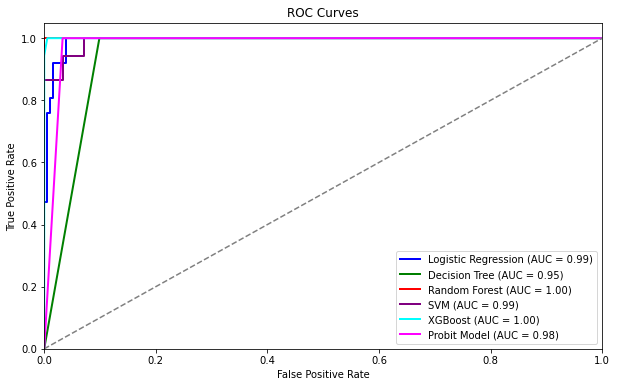

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
from scipy.stats import norm

# Define the probit link function
def probit_link_function(X, beta):
    return norm.cdf(np.dot(X, beta))

# Define the log likelihood function for Probit model
def log_likelihood(beta, X, y):
    p = probit_link_function(X, beta)
    return -np.sum(y * np.log(p + 1e-9) + (1 - y) * np.log(1 - p + 1e-9))


# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.8, random_state=42)

# Step 2: Standardize the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Step 4: Train Decision Tree Model
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_scaled, y_train)

# Step 5: Train Random Forest Model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)


# Step 7: Train SVM Model
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_scaled, y_train)

# Step 8: Train XGBoost Model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_scaled, y_train)

# Step 9: Train Probit Model
initial_beta = np.zeros(X_train_scaled.shape[1])
result = minimize(log_likelihood, initial_beta, args=(X_train_scaled, y_train), method='BFGS')
optimal_beta = result.x

# Step 10: Make Predictions
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_dt = dt_classifier.predict(X_test_scaled)
y_pred_rf = rf_classifier.predict(X_test_scaled)

y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_xgb = xgb_classifier.predict(X_test_scaled)
y_pred_prob_probit = probit_link_function(X_test_scaled, optimal_beta)
y_pred_probit = (y_pred_prob_probit >= 0.5).astype(int)

# Step 11: Calculate Accuracies
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_probit = accuracy_score(y_test, y_pred_probit)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Decision Tree Accuracy:", accuracy_dt)
print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)
print("XGBoost Accuracy:", accuracy_xgb)
print("Probit Model Accuracy:", accuracy_probit)

# Step 12: Compute ROC curves and AUC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)



fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test_scaled)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_probit, tpr_probit, _ = roc_curve(y_test, y_pred_prob_probit)
roc_auc_probit = auc(fpr_probit, tpr_probit)

# Step 13: Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_xgb, tpr_xgb, color='cyan', lw=2, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot(fpr_probit, tpr_probit, color='magenta', lw=2, label='Probit Model (AUC = %0.2f)' % roc_auc_probit)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()
